# Task 2: Descriptive Analytics


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## a) Temporal Seasons and Seasonality


First we read in the preprocessed dataset from Task 1.


In [90]:
df_charging_sessions = pd.read_csv(
    "charging_sessions_preprocessed.csv", parse_dates=["connectionTime"]
)

df_charging_sessions.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs,totalConnectionTime,totalChargingTime,userInformation
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,[WhPerMile ...,0 days 06:02:21,0 days 04:22:41,True
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,[WhPerMile ...,0 days 09:01:31,0 days 06:41:15,True
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,[WhPerMile ...,0 days 10:42:47,0 days 02:38:31,True
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,[WhPerMile ...,0 days 02:38:41,0 days 01:18:47,True
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,[WhPerMile ...,0 days 08:08:39,0 days 04:17:29,True


Next we drop all columns, that are not relevant for the visualization of temporal patterns and seasonality. In the same step we transfrom the datetime values to the local time in LA.


In [91]:
IRRELEVANT_COLUMNS = [
    "disconnectTime",
    "doneChargingTime",
    "kWhDelivered",
    "sessionID",
    "siteID",
    "spaceID",
    "stationID",
    "userID",
    "userInputs",
    "totalConnectionTime",
    "totalChargingTime",
    "userInformation",
]

# drop irrelevant columns
df_charging_sessions = df_charging_sessions.drop(IRRELEVANT_COLUMNS, axis=1)
# transform datetime values
df_charging_sessions["connectionTime"] = df_charging_sessions[
    "connectionTime"
].dt.tz_convert("America/Los_Angeles")

df_charging_sessions.head()

,id,connectionTime
0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00
1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00
2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00
3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00
4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00


Now we create three new columns for the "hour", "day" and "season", which the charging session occurred in.


In [92]:
# calulate hour of the day
df_charging_sessions["hour"] = df_charging_sessions["connectionTime"].dt.hour

# calulate day of the week
df_charging_sessions["day"] = df_charging_sessions["connectionTime"].dt.day_of_week
df_charging_sessions["day"] = df_charging_sessions["day"].map(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
)

# calulate season of the year
df_charging_sessions["season"] = df_charging_sessions["connectionTime"].dt.month
df_charging_sessions["season"] = df_charging_sessions["season"].map(
    {
        1: "Winter",
        2: "Winter",
        3: "Spring",
        4: "Spring",
        5: "Spring",
        6: "Summer",
        7: "Summer",
        8: "Summer",
        9: "Autumn",
        10: "Autumn",
        11: "Autumn",
        12: "Winter",
    }
)

df_charging_sessions

,id,connectionTime,hour,day,season
0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,5,Thursday,Winter
1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,5,Thursday,Winter
2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,5,Thursday,Winter
3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,5,Thursday,Winter
4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,6,Thursday,Winter
...,...,...,...,...,...
60916,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,14,Monday,Summer
60917,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,14,Monday,Summer
60918,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,15,Monday,Summer
60919,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,15,Monday,Summer


In [93]:
DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
SEASONS = ["Winter", "Spring", "Summer", "Autumn"]

# hourly
df_number_of_charging_sessions_hourly = df_charging_sessions.groupby("hour")[
    "id"
].nunique()
df_number_of_charging_sessions_hourly = df_number_of_charging_sessions_hourly.reindex(
    range(24)
)

# weekly
df_number_of_charging_sessions_weekly = df_charging_sessions.groupby("day")[
    "id"
].nunique()
df_number_of_charging_sessions_weekly = (
    df_number_of_charging_sessions_weekly.groupby(["day"]).sum().reindex(DAYS)
)

# seasons
df_number_of_charging_sessions_seasons = df_charging_sessions.groupby("season")[
    "id"
].nunique()
df_number_of_charging_sessions_seasons = (
    df_number_of_charging_sessions_seasons.groupby(["season"]).sum().reindex(SEASONS)
)


df_number_of_charging_sessions_hourly
df_number_of_charging_sessions_weekly
df_number_of_charging_sessions_seasons

season
Winter    14171
Spring    13523
Summer    16984
Autumn    16243
Name: id, dtype: int64

We focus on both sites at the same time, later individually


/Users/linuslange/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linuslange/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linuslange/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linuslange/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

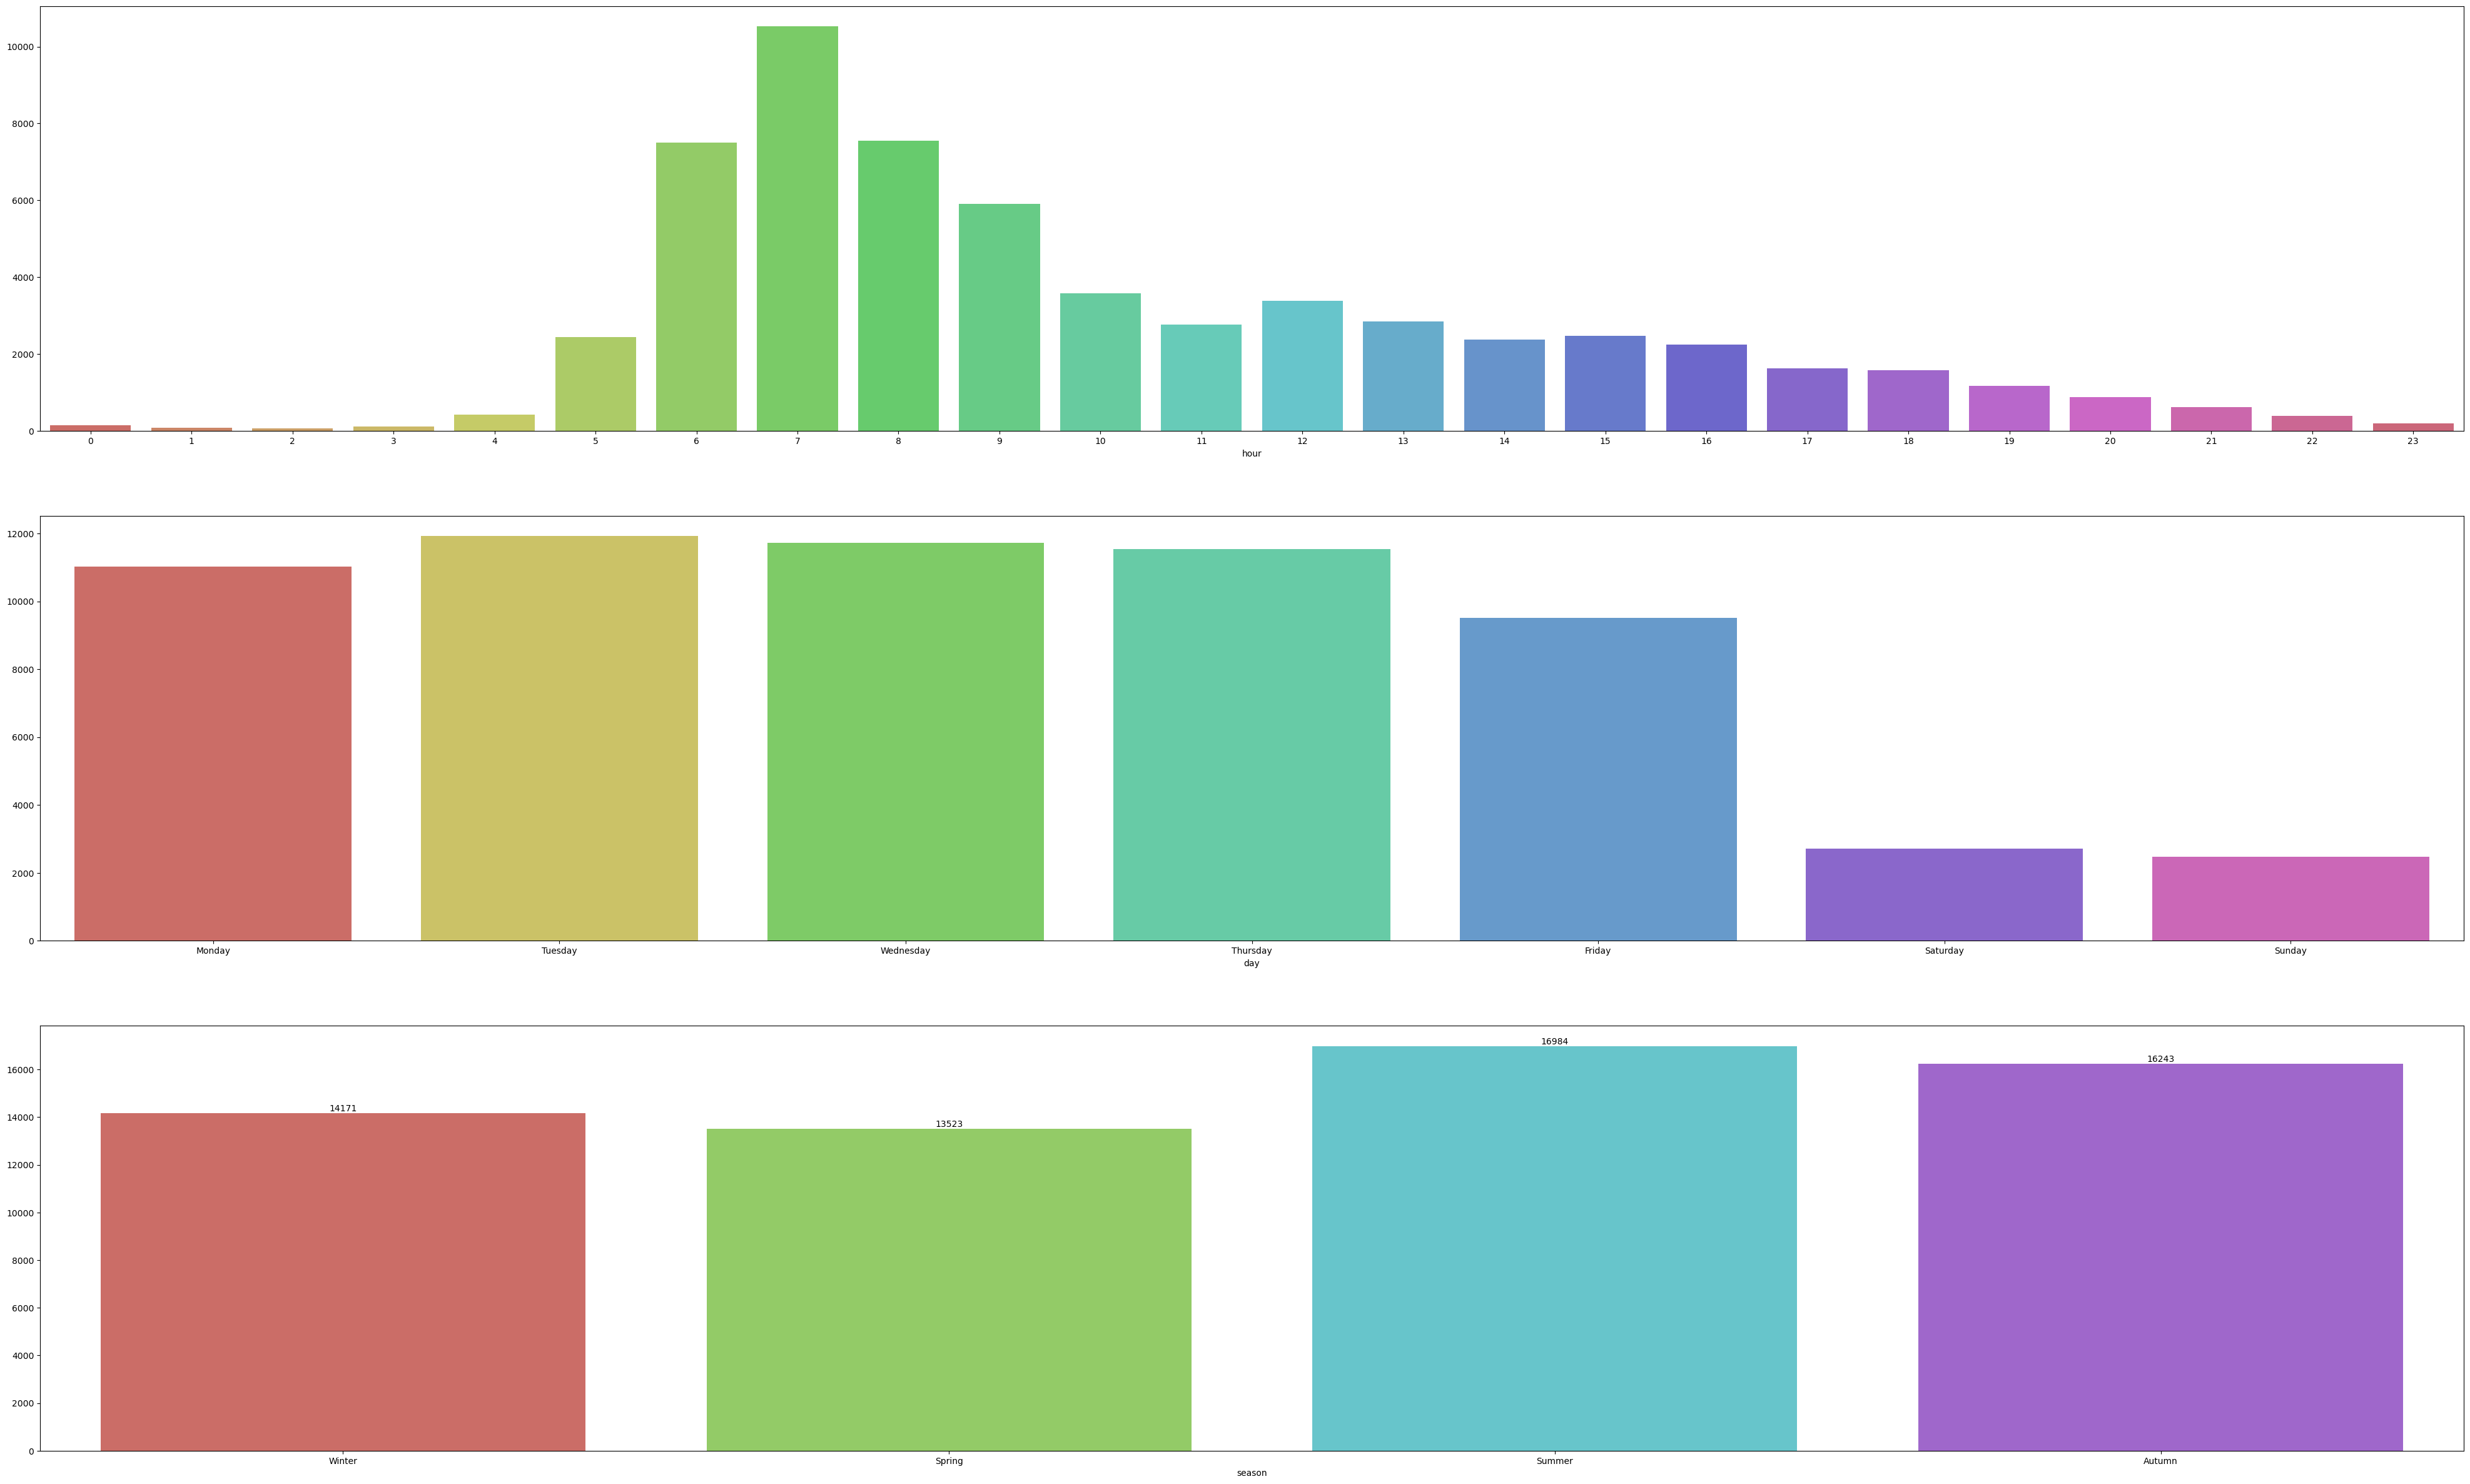

In [94]:
f, axes = plt.subplots(3, 1, figsize=(50, 30))

ax = sns.barplot(
    x=df_number_of_charging_sessions_hourly.index,
    y=df_number_of_charging_sessions_hourly.values,
    ax=axes[0],
    palette="hls",
)

sns.barplot(
    x=df_number_of_charging_sessions_weekly.index,
    y=df_number_of_charging_sessions_weekly.values,
    ax=axes[1],
    palette="hls",
)

ax = sns.barplot(
    x=df_number_of_charging_sessions_seasons.index,
    y=df_number_of_charging_sessions_seasons.values,
    ax=axes[2],
    palette="hls",
)
ax.bar_label(ax.containers[0])


plt.show()